<a href="https://colab.research.google.com/github/mellalbuquerque/tourismdata/blob/main/An%C3%A1lise_de_OTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este relatório analisa os padrões de compra de passagens aéreas para entender comportamento do consumidor, tendências e insights estratégicos.

# **Análises iniciais**

**Carregando bibliotecas**

In [ ]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt

**Carregando os dados**

In [ ]:
df = pd.read_csv('promo_2023-2024.csv', sep=';', encoding='utf-8')
df.head()

,DataPedido,EmailContato,NomeContato,CiaAerea,DataViagem,Trecho,NumeroPedido,TipoDocumentoPax,total,DataNascimentoPax,...,Tarifa,TarifaPax,TaxaDu,TaxaEmbarque,TelefoneEmpresa,Tipo de Cliente,TelefoneContato,Total acumulado de Qtd de Emissoes em Antecedencia por Periodo,Ultima compra cliente related,ultimacompra
0,01/01/2023,abrahaomendes26@gmail.com,abraao guedelha mendes,LATAM,17/02/2023,CGB/SLZ/SLZ/CGB,1220150,CPF,"1086,1",24/08/1983,...,"860,62","860,62",0,"88,21",NaN,Pessoa Física,(98) 98250-4503,1,27/04/2024,27/04/2024
1,01/01/2023,abrahaomendes26@gmail.com,francisco costa santos,LATAM,17/02/2023,CGB/SLZ,1220160,CPF,"681,8",14/07/1973,...,"550,1","550,1",0,"48,69",NaN,Pessoa Física,(98) 98250-4503,1,01/01/2023,01/01/2023
2,01/01/2023,amaralbarbosa01@hotmail.com,amaral barbosa de lima,Azul,25/01/2023,FOR/CGB,1220146,CPF,"937,4",04/12/1979,...,"807,9","807,9",0,"48,71",NaN,Pessoa Física,(88) 99655-4443,1,25/10/2024,12/08/2024
3,01/01/2023,amaralbarbosa01@hotmail.com,amaral barbosa de lima,Gol,13/01/2023,VCP/CGB,1220148,CPF,"908,23",30/11/1979,...,"785,9","785,9",0,"28,02",NaN,Pessoa Física,(88) 99655-4443,1,25/10/2024,22/08/2024
4,01/01/2023,andressa.kathily@gmail.com,andressa kathily de macedo siqueira,Gol,05/01/2023,GRU/REC,1220228,CPF,"1784,8",18/12/1965,...,"1595,61","1595,61",0,"29,63",NaN,Pessoa Física,(81) 99636-9443,1,20/11/2024,07/06/2024


In [ ]:
print(df.columns)

Index(['DataPedido', 'EmailContato', 'NomeContato', 'CiaAerea', 'DataViagem',
       'Trecho', 'NumeroPedido', 'TipoDocumentoPax', 'total',
       'DataNascimentoPax', 'GeneroPax', 'FormaRecebimento', 'Trecho Origem',
       'BandeiraCartao', 'PrimeiroNomePax', 'UltimoNomePax', 'EmailPax',
       'IdadePax', 'CidadePax', 'EstadoPax', 'Estado', 'TipoPax', 'PhonePax',
       'DataRetorno', 'Bandeira do cartao', 'CnpjEmpresa', 'ContatoEmpresa',
       'Data da reserva edt', 'DataEmissao', 'DataEmissao2',
       'Data de emissão edt', 'DataPedido - Copiar', 'DataReserva',
       'Dias em Viagem', 'DocumentoPax', 'Dt da ultima compra pax',
       'EmailEmpresa', 'Hora do Pedido', 'Intervalo de idades',
       'IntervaloMedioDias', 'locator', 'NacInt', 'NomeEmpresa',
       'Periodo Horario do Pedido', 'primeiracompra', 'provider', 'qtd',
       'Qtd de Emissoes', 'Qtde dias ult. compra', 'Recencia', 'status',
       'Status do Pedido', 'Tarifa', 'TarifaPax', 'TaxaDu', 'TaxaEmbarque',
      



---



**Volume de pedidos ao longo do tempo**

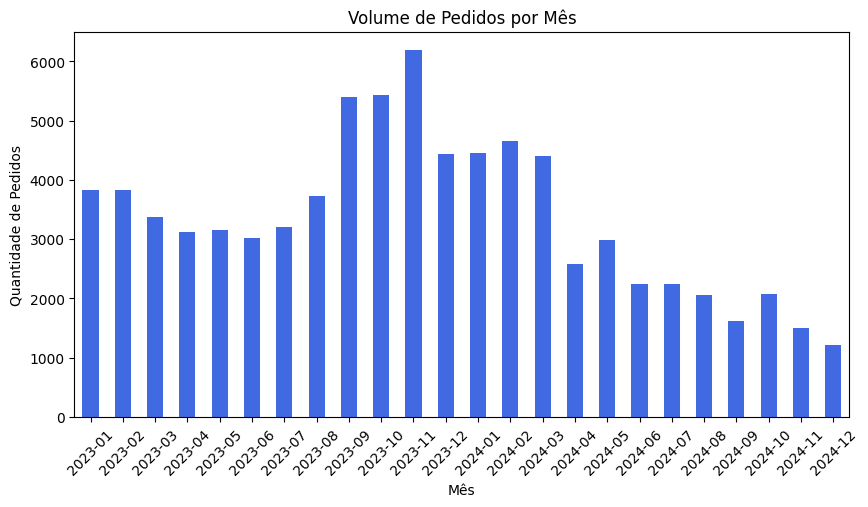

In [ ]:
# Contar pedidos por mês
df['Mês'] = df['DataPedido'].dt.to_period('M')
pedidos_por_mes = df.groupby('Mês').size()

# Plotar gráfico
plt.figure(figsize=(10, 5))
pedidos_por_mes.plot(kind='bar', color='royalblue')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Pedidos')
plt.title('Volume de Pedidos por Mês')
plt.xticks(rotation=45)
plt.show()

**Perfil dos clientes**

In [ ]:
# Contar clientes B2B e B2C
tipo_cliente = df['Tipo de Cliente'].value_counts(normalize=True) * 100

# Exibir resultado
print(tipo_cliente)


Tipo de Cliente
B2C    84.407544
B2B    15.592456
Name: proportion, dtype: float64


# **Destinos**

In [ ]:
# Baixar e processar o arquivo de referência dos aeroportos
url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
colunas = [
    "Airport_ID", "Name", "City", "Country", "IATA", "ICAO", "Latitude",
    "Longitude", "Altitude", "Timezone", "DST", "Tz", "Type", "Source"
]
response = requests.get(url)
if response.status_code == 200:
    data = response.text
    aeroportos = pd.read_csv(StringIO(data), header=None, names=colunas)
    aeroportos = aeroportos[aeroportos["IATA"].notnull() & (aeroportos["IATA"] != "\\N")]
    aeroportos = aeroportos[["IATA", "City", "Country"]]
    aeroportos.rename(columns={"IATA": "Codigo", "City": "Cidade", "Country": "Pais"}, inplace=True)
    aeroportos.to_csv("aeroportos.csv", index=False)
    print("Arquivo aeroportos.csv criado com sucesso!")
else:
    print(f"Erro ao baixar os dados: {response.status_code}")

# Carregar os dados dos CSVs principais
df = pd.read_csv('promo_2023-2024.csv', sep=';', encoding='utf-8')  # or sep='\t' if using tabs

# Função para separar origem e destino
def processar_trecho(trecho):
    if pd.isnull(trecho):  # Verificar se o valor é nulo
        return None, None  # Retorna valores nulos para Origem e Destino
    # Separar os códigos pelo separador "/"
    codigos = trecho.split('/')
    # Determinar a origem e o destino final
    origem = codigos[0]
    destino_final = codigos[-1]
    # Verificar se é ida e volta
    if destino_final == origem and len(codigos) > 1:
        destino_final = codigos[-2]
    return origem, destino_final

# Aplicar a função na coluna "Trecho"
df[['Origem', 'Destino']] = df['Trecho'].apply(lambda x: pd.Series(processar_trecho(x)))

Arquivo aeroportos.csv criado com sucesso!


# **Calendários de destinos mais vendidos**

In [ ]:
# Converter as colunas de data para o formato datetime
df['DataPedido'] = pd.to_datetime(df['DataPedido'], errors='coerce', dayfirst=True)
df['DataViagem'] = pd.to_datetime(df['DataViagem'], errors='coerce', dayfirst=True)


# Calcular a antecedência de compra (em dias)
df['Antecedencia (dias)'] = (df['DataViagem'] - df['DataPedido']).dt.days

# Criar um dicionário para mapear códigos IATA para cidade/estado
mapa_aeroportos = dict(zip(aeroportos['Codigo'], aeroportos['Cidade'] + ', ' + aeroportos['Pais']))

# Substituir os códigos de "Origem" e "Destino" pelos nomes das cidades e estados
df['Origem'] = df['Origem'].map(mapa_aeroportos)
df['Destino'] = df['Destino'].map(mapa_aeroportos)

# Classificar os e-mails em B2B e B2C
def classificar_email(email):
    if pd.isnull(email):
        return 'Desconhecido'
    dominios_b2c = ['gmail.com', 'hotmail.com', 'yahoo.com', 'outlook.com']
    dominio = email.split('@')[-1]
    return 'B2C' if dominio in dominios_b2c else 'B2B'

# Criar a coluna "Tipo de Cliente" com base no e-mail
df['Tipo de Cliente'] = df['EmailContato'].apply(classificar_email)

# Criar calendários nacional e internacional, separados por B2B e B2C
calendarios = {
    "Nacional B2B": {},
    "Nacional B2C": {},
    "Internacional B2B": {},
    "Internacional B2C": {}
}

for mes in range(1, 13):
    mes_nome = pd.to_datetime(f'2024-{mes}-01').strftime('%B')  # Nome do mês

    # Filtrar dados nacionais e internacionais
    df_nacional = df[df['Destino'].str.contains(', Brazil', na=False, case=False)]
    df_internacional = df[~df['Destino'].str.contains(', Brazil', na=False, case=False)]

    # Separar por B2B e B2C
    df_nacional_b2b = df_nacional[df_nacional['Tipo de Cliente'] == 'B2B']
    df_nacional_b2c = df_nacional[df_nacional['Tipo de Cliente'] == 'B2C']
    df_internacional_b2b = df_internacional[df_internacional['Tipo de Cliente'] == 'B2B']
    df_internacional_b2c = df_internacional[df_internacional['Tipo de Cliente'] == 'B2C']

    # Preencher os calendários
    calendarios["Nacional B2B"][mes_nome] = {
        'Mais comprados': df_nacional_b2b[df_nacional_b2b['DataPedido'].dt.month == mes]['Destino'].value_counts().head(10).index.tolist(),
        'Mais viajados': df_nacional_b2b[df_nacional_b2b['DataViagem'].dt.month == mes]['Destino'].value_counts().head(10).index.tolist()
    }
    calendarios["Nacional B2C"][mes_nome] = {
        'Mais comprados': df_nacional_b2c[df_nacional_b2c['DataPedido'].dt.month == mes]['Destino'].value_counts().head(10).index.tolist(),
        'Mais viajados': df_nacional_b2c[df_nacional_b2c['DataViagem'].dt.month == mes]['Destino'].value_counts().head(10).index.tolist()
    }
    calendarios["Internacional B2B"][mes_nome] = {
        'Mais comprados': df_internacional_b2b[df_internacional_b2b['DataPedido'].dt.month == mes]['Destino'].value_counts().head(10).index.tolist(),
        'Mais viajados': df_internacional_b2b[df_internacional_b2b['DataViagem'].dt.month == mes]['Destino'].value_counts().head(10).index.tolist()
    }
    calendarios["Internacional B2C"][mes_nome] = {
        'Mais comprados': df_internacional_b2c[df_internacional_b2c['DataPedido'].dt.month == mes]['Destino'].value_counts().head(10).index.tolist(),
        'Mais viajados': df_internacional_b2c[df_internacional_b2c['DataViagem'].dt.month == mes]['Destino'].value_counts().head(10).index.tolist()
    }

# Exibir os calendários no formato solicitado
for tipo, calendario in calendarios.items():
    print(f"\nCalendário: {tipo}")
    for mes, info in calendario.items():
        print(f"Em {mes}, esses destinos foram os mais vendidos:")
        for destino in info['Mais comprados']:
            print(f"- {destino}")
        print("E os passageiros embarcaram para esses destinos:")
        for destino in info['Mais viajados']:
            print(f"- {destino}")


Calendário: Nacional B2B
Em January, esses destinos foram os mais vendidos:
- Sao Paulo, Brazil
- Rio De Janeiro, Brazil
- Recife, Brazil
- Porto Alegre, Brazil
- Curitiba, Brazil
- Belo Horizonte, Brazil
- Brasilia, Brazil
- Goiania, Brazil
- Salvador, Brazil
- Cuiaba, Brazil
E os passageiros embarcaram para esses destinos:
- Sao Paulo, Brazil
- Rio De Janeiro, Brazil
- Recife, Brazil
- Fortaleza, Brazil
- Belo Horizonte, Brazil
- Porto Alegre, Brazil
- Goiania, Brazil
- Salvador, Brazil
- Curitiba, Brazil
- Joao Pessoa, Brazil
Em February, esses destinos foram os mais vendidos:
- Sao Paulo, Brazil
- Rio De Janeiro, Brazil
- Fortaleza, Brazil
- Curitiba, Brazil
- Belo Horizonte, Brazil
- Recife, Brazil
- Porto Alegre, Brazil
- Brasilia, Brazil
- Salvador, Brazil
- Vitoria, Brazil
E os passageiros embarcaram para esses destinos:
- Sao Paulo, Brazil
- Rio De Janeiro, Brazil
- Recife, Brazil
- Porto Alegre, Brazil
- Belo Horizonte, Brazil
- Curitiba, Brazil
- Fortaleza, Brazil
- Brasili

In [ ]:
df.head()

,DataPedido,EmailContato,NomeContato,CiaAerea,DataViagem,Trecho,NumeroPedido,TipoDocumentoPax,total,DataNascimentoPax,...,TaxaEmbarque,TelefoneEmpresa,Tipo de Cliente,TelefoneContato,Total acumulado de Qtd de Emissoes em Antecedencia por Periodo,Ultima compra cliente related,ultimacompra,Origem,Destino,Antecedencia (dias)
0,2023-01-01,abrahaomendes26@gmail.com,abraao guedelha mendes,LATAM,2023-02-17,CGB/SLZ/SLZ/CGB,1220150,CPF,"1086,1",24/08/1983,...,"88,21",NaN,B2C,(98) 98250-4503,1,27/04/2024,27/04/2024,"Cuiaba, Brazil","Sao Luis, Brazil",47
1,2023-01-01,abrahaomendes26@gmail.com,francisco costa santos,LATAM,2023-02-17,CGB/SLZ,1220160,CPF,"681,8",14/07/1973,...,"48,69",NaN,B2C,(98) 98250-4503,1,01/01/2023,01/01/2023,"Cuiaba, Brazil","Sao Luis, Brazil",47
2,2023-01-01,amaralbarbosa01@hotmail.com,amaral barbosa de lima,Azul,2023-01-25,FOR/CGB,1220146,CPF,"937,4",04/12/1979,...,"48,71",NaN,B2C,(88) 99655-4443,1,25/10/2024,12/08/2024,"Fortaleza, Brazil","Cuiaba, Brazil",24
3,2023-01-01,amaralbarbosa01@hotmail.com,amaral barbosa de lima,Gol,2023-01-13,VCP/CGB,1220148,CPF,"908,23",30/11/1979,...,"28,02",NaN,B2C,(88) 99655-4443,1,25/10/2024,22/08/2024,"Campinas, Brazil","Cuiaba, Brazil",12
4,2023-01-01,andressa.kathily@gmail.com,andressa kathily de macedo siqueira,Gol,2023-01-05,GRU/REC,1220228,CPF,"1784,8",18/12/1965,...,"29,63",NaN,B2C,(81) 99636-9443,1,20/11/2024,07/06/2024,"Sao Paulo, Brazil","Recife, Brazil",4




---



In [ ]:
# Garantir que a lista de mais compradas e mais viajadas contenha apenas valores não nulos
mais_compradas = df['Destino'].dropna().value_counts().head(10).index.tolist()
mais_viajadas = df['Destino'].dropna().value_counts().head(10).index.tolist()

# Filtrar cidades nacionais e internacionais das listas
cidades_nacionais_compradas = [cidade for cidade in mais_compradas if ', Brazil' in str(cidade)]
cidades_internacionais_compradas = [cidade for cidade in mais_compradas if ', Brazil' not in str(cidade)]

cidades_nacionais_viajadas = [cidade for cidade in mais_viajadas if ', Brazil' in str(cidade)]
cidades_internacionais_viajadas = [cidade for cidade in mais_viajadas if ', Brazil' not in str(cidade)]

In [ ]:
# Identificar as 10 mais compradas e 10 mais viajadas
mais_compradas = df['Destino'].dropna().value_counts().head(10).index.tolist()
mais_viajadas = df['Destino'].dropna().value_counts().head(10).index.tolist()

In [ ]:
mais_compradas

['Sao Paulo, Brazil',
 'Rio De Janeiro, Brazil',
 'Recife, Brazil',
 'Salvador, Brazil',
 'Fortaleza, Brazil',
 'Porto Alegre, Brazil',
 'Curitiba, Brazil',
 'Belem, Brazil',
 'Belo Horizonte, Brazil',
 'Brasilia, Brazil']

In [ ]:
mais_viajadas

['Sao Paulo, Brazil',
 'Rio De Janeiro, Brazil',
 'Recife, Brazil',
 'Salvador, Brazil',
 'Fortaleza, Brazil',
 'Porto Alegre, Brazil',
 'Curitiba, Brazil',
 'Belem, Brazil',
 'Belo Horizonte, Brazil',
 'Brasilia, Brazil']

In [ ]:
# Identificar as 10 mais compradas e 10 mais viajadas nacionais e internacionais
compradas_nacional = df[df['Destino'].str.contains(', Brazil', na=False)]['Destino'].value_counts().head(10)
compradas_internacional = df[~df['Destino'].str.contains(', Brazil', na=False)]['Destino'].value_counts().head(10)

viajadas_nacional = df[df['Destino'].str.contains(', Brazil', na=False)]['Destino'].value_counts().head(10)
viajadas_internacional = df[~df['Destino'].str.contains(', Brazil', na=False)]['Destino'].value_counts().head(10)

# Calcular porcentagens
compradas_nacional_percent = (compradas_nacional / compradas_nacional.sum()) * 100
compradas_internacional_percent = (compradas_internacional / compradas_internacional.sum()) * 100
viajadas_nacional_percent = (viajadas_nacional / viajadas_nacional.sum()) * 100
viajadas_internacional_percent = (viajadas_internacional / viajadas_internacional.sum()) * 100

# Exibir os resultados
print("Cidades nacionais mais compradas (com porcentagens):")
for cidade, percentual in compradas_nacional_percent.items():
    print(f"- {cidade}: {percentual:.2f}%")

print("\nCidades internacionais mais compradas (com porcentagens):")
for cidade, percentual in compradas_internacional_percent.items():
    print(f"- {cidade}: {percentual:.2f}%")

print("\nCidades nacionais mais viajadas (com porcentagens):")
for cidade, percentual in viajadas_nacional_percent.items():
    print(f"- {cidade}: {percentual:.2f}%")

print("\nCidades internacionais mais viajadas (com porcentagens):")
for cidade, percentual in viajadas_internacional_percent.items():
    print(f"- {cidade}: {percentual:.2f}%")

Cidades nacionais mais compradas (com porcentagens):
- Sao Paulo, Brazil: 31.58%
- Rio De Janeiro, Brazil: 14.43%
- Recife, Brazil: 11.58%
- Salvador, Brazil: 7.61%
- Fortaleza, Brazil: 6.63%
- Porto Alegre, Brazil: 5.95%
- Curitiba, Brazil: 5.77%
- Belem, Brazil: 5.63%
- Belo Horizonte, Brazil: 5.53%
- Brasilia, Brazil: 5.30%

Cidades internacionais mais compradas (com porcentagens):
- Buenos Aires, Argentina: 21.88%
- Santiago, Chile: 15.20%
- Lisbon, Portugal: 13.10%
- Paris, France: 10.11%
- Orlando, United States: 8.40%
- Rome, Italy: 8.02%
- Miami, United States: 6.74%
- San Carlos De Bariloche, Argentina: 6.11%
- New York, United States: 5.66%
- Madrid, Spain: 4.77%

Cidades nacionais mais viajadas (com porcentagens):
- Sao Paulo, Brazil: 31.58%
- Rio De Janeiro, Brazil: 14.43%
- Recife, Brazil: 11.58%
- Salvador, Brazil: 7.61%
- Fortaleza, Brazil: 6.63%
- Porto Alegre, Brazil: 5.95%
- Curitiba, Brazil: 5.77%
- Belem, Brazil: 5.63%
- Belo Horizonte, Brazil: 5.53%
- Brasilia, Bra

In [ ]:
# Estatísticas de antecedência de compra
antecedencia_min = df['Antecedencia (dias)'].min()
antecedencia_max = df['Antecedencia (dias)'].max()
antecedencia_media = df['Antecedencia (dias)'].mean()
antecedencia_mediana = df['Antecedencia (dias)'].median()

print("Estatísticas de Antecedência de Compra:")
print(f"Mínima: {antecedencia_min} dias")
print(f"Máxima: {antecedencia_max} dias")
print(f"Média: {antecedencia_media:.2f} dias")
print(f"Mediana: {antecedencia_mediana} dias")

Estatísticas de Antecedência de Compra:
Mínima: 0 dias
Máxima: 359 dias
Média: 47.73 dias
Mediana: 30.0 dias


In [ ]:
# Filtrar apenas os passageiros cujo destino final é São Paulo (SP)
df_sp = df[df['Destino'].str.contains('Sao Paulo', na=False, case=False)]

# Agrupar por mês e contar a quantidade de passagens compradas para SP
passageiros_sp_mensal = df_sp.groupby(df_sp['DataPedido'].dt.to_period('M')).size()

# Converter para DataFrame
passageiros_sp_mensal = passageiros_sp_mensal.reset_index()
passageiros_sp_mensal.columns = ['Mês', 'Quantidade de Passageiros']

# Exibir o resultado
print(passageiros_sp_mensal)

        Mês  Quantidade de Passageiros
0   2023-01                        704
1   2023-02                        726
2   2023-03                        594
3   2023-04                        669
4   2023-05                        528
5   2023-06                        542
6   2023-07                        580
7   2023-08                        750
8   2023-09                       1028
9   2023-10                       1025
10  2023-11                       1233
11  2023-12                        822
12  2024-01                        923
13  2024-02                       1044
14  2024-03                        827
15  2024-04                        508
16  2024-05                        567
17  2024-06                        407
18  2024-07                        509
19  2024-08                        413
20  2024-09                        315
21  2024-10                        383
22  2024-11                        258
23  2024-12                        221




---



In [ ]:
# Filtrar apenas os destinos dentro do Brasil
df_brasil = df[df['Destino'].str.contains(', Brazil', na=False)]

# Extrair apenas a cidade (removendo ', Brazil')
df_brasil['Cidade'] = df_brasil['Destino'].str.replace(', Brazil', '', regex=False)

# Contar a frequência de cada cidade
cidades_mais_vendidas = df_brasil['Cidade'].value_counts().reset_index()
cidades_mais_vendidas.columns = ['Cidade', 'Quantidade de Vendas']

print(cidades_mais_vendidas.head())

           Cidade  Quantidade de Vendas
0       Sao Paulo                 15576
1  Rio De Janeiro                  7115
2          Recife                  5712
3        Salvador                  3755
4       Fortaleza                  3268


<ipython-input-15-57763fc3107b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brasil['Cidade'] = df_brasil['Destino'].str.replace(', Brazil', '', regex=False)


In [ ]:
df.head()

,DataPedido,EmailContato,NomeContato,CiaAerea,DataViagem,Trecho,NumeroPedido,TipoDocumentoPax,total,DataNascimentoPax,...,TaxaEmbarque,TelefoneEmpresa,Tipo de Cliente,TelefoneContato,Total acumulado de Qtd de Emissoes em Antecedencia por Periodo,Ultima compra cliente related,ultimacompra,Origem,Destino,Antecedencia (dias)
0,2023-01-01,abrahaomendes26@gmail.com,abraao guedelha mendes,LATAM,2023-02-17,CGB/SLZ/SLZ/CGB,1220150,CPF,"1086,1",24/08/1983,...,"88,21",NaN,B2C,(98) 98250-4503,1,27/04/2024,27/04/2024,"Cuiaba, Brazil","Sao Luis, Brazil",47
1,2023-01-01,abrahaomendes26@gmail.com,francisco costa santos,LATAM,2023-02-17,CGB/SLZ,1220160,CPF,"681,8",14/07/1973,...,"48,69",NaN,B2C,(98) 98250-4503,1,01/01/2023,01/01/2023,"Cuiaba, Brazil","Sao Luis, Brazil",47
2,2023-01-01,amaralbarbosa01@hotmail.com,amaral barbosa de lima,Azul,2023-01-25,FOR/CGB,1220146,CPF,"937,4",04/12/1979,...,"48,71",NaN,B2C,(88) 99655-4443,1,25/10/2024,12/08/2024,"Fortaleza, Brazil","Cuiaba, Brazil",24
3,2023-01-01,amaralbarbosa01@hotmail.com,amaral barbosa de lima,Gol,2023-01-13,VCP/CGB,1220148,CPF,"908,23",30/11/1979,...,"28,02",NaN,B2C,(88) 99655-4443,1,25/10/2024,22/08/2024,"Campinas, Brazil","Cuiaba, Brazil",12
4,2023-01-01,andressa.kathily@gmail.com,andressa kathily de macedo siqueira,Gol,2023-01-05,GRU/REC,1220228,CPF,"1784,8",18/12/1965,...,"29,63",NaN,B2C,(81) 99636-9443,1,20/11/2024,07/06/2024,"Sao Paulo, Brazil","Recife, Brazil",4


In [ ]:
print(df.columns)

Index(['DataPedido', 'EmailContato', 'NomeContato', 'CiaAerea', 'DataViagem',
       'Trecho', 'NumeroPedido', 'TipoDocumentoPax', 'total',
       'DataNascimentoPax', 'GeneroPax', 'FormaRecebimento', 'Trecho Origem',
       'BandeiraCartao', 'PrimeiroNomePax', 'UltimoNomePax', 'EmailPax',
       'IdadePax', 'CidadePax', 'EstadoPax', 'Estado', 'TipoPax', 'PhonePax',
       'DataRetorno', 'Bandeira do cartao', 'CnpjEmpresa', 'ContatoEmpresa',
       'Data da reserva edt', 'DataEmissao', 'DataEmissao2',
       'Data de emissão edt', 'DataPedido - Copiar', 'DataReserva',
       'Dias em Viagem', 'DocumentoPax', 'Dt da ultima compra pax',
       'EmailEmpresa', 'Hora do Pedido', 'Intervalo de idades',
       'IntervaloMedioDias', 'locator', 'NacInt', 'NomeEmpresa',
       'Periodo Horario do Pedido', 'primeiracompra', 'provider', 'qtd',
       'Qtd de Emissoes', 'Qtde dias ult. compra', 'Recencia', 'status',
       'Status do Pedido', 'Tarifa', 'TarifaPax', 'TaxaDu', 'TaxaEmbarque',
      



---



**📊 Antecedência de Compra por Tipo de Cliente**

In [ ]:
df.groupby('Tipo de Cliente')['Antecedencia (dias)'].describe()


,count,mean,std,min,25%,50%,75%,max
Tipo de Cliente,,,,,,,,
B2B,12592.0,40.583942,47.909655,0.0,9.0,24.0,53.0,331.0
B2C,68165.0,49.052388,51.023505,0.0,15.0,32.0,65.0,359.0


**📅 Dias Mais Populares para Compras e Viagens**

In [ ]:
df['Dia_da_Semana_Pedido'] = df['DataPedido'].dt.day_name()
df['Dia_da_Semana_Viagem'] = df['DataViagem'].dt.day_name()

df['Dia_da_Semana_Pedido'].value_counts()
df['Dia_da_Semana_Viagem'].value_counts()


,count
Dia_da_Semana_Viagem,
Friday,13590
Thursday,12866
Wednesday,12350
Tuesday,11970
Saturday,10528
Monday,10494
Sunday,8959




---



In [ ]:
df['Faixa_Etaria'] = pd.cut(df['IdadePax'], bins=[0, 18, 30, 45, 60, 100],
                            labels=['Menor de 18', '18-30', '31-45', '46-60', '60+'])

df['Faixa_Etaria'].value_counts()


,count
Faixa_Etaria,
31-45,26833
46-60,18979
18-30,14526
Menor de 18,10167
60+,10148


In [ ]:
df['Comprando_para_terceiros'] = df['NomeContato'] != df['PrimeiroNomePax']
df['Comprando_para_terceiros'].value_counts()


,count
Comprando_para_terceiros,
True,80745
False,12


In [ ]:
df['GeneroPax'].value_counts()


,count
GeneroPax,
F,41982
M,38775


In [ ]:
df.groupby('EmailContato')['total'].sum().sort_values(ascending=False)


,total
EmailContato,
arq.silvanaschmoeller@gmail.com,"999,92"
rbg12361@hotmail.com,"999,92"
andersondiasxavier86@gmail.com,"999,92"
martinsamilton7@gmail.com,"999,84999,84999,84"
janeteflc@gmail.com,"999,78999,78860,96860,96841,621192,781899,0811..."
...,...
vivianevilarsoares@gmail.com,"1000,481000,481138,84"
miminha729@gmail.com,"1000,471000,471000,47"
deisylobato33@gmail.com,"1000,38"


In [ ]:
df['BandeiraCartao'].value_counts()


,count
BandeiraCartao,
MC,37018
VI,25341
EL,3794
AX,759
HC,311


In [ ]:
df['CiaAerea'].value_counts()


,count
CiaAerea,
Azul,29535
Gol,25519
LATAM,23260
Argentinas,439
Tap,407
Copa,208
Delta,195
Sky Airline,150
United,142


In [ ]:
df['Trecho'].value_counts().head(10)


,count
Trecho,
REC/GRU,987
GRU/REC,980
GRU/REC/REC/GRU,961
REC/GRU/GRU/REC,702
CGB/GRU/GRU/CGB,526
REC/CGH,437
CNF/CGH/CGH/CNF,423
SSA/CGH,395
CGH/SSA,374


In [ ]:
df['EmailContato'].value_counts().head(10)


,count
EmailContato,
recepcao@sendi.com.br,399
viagens@taurasmontagens.com.br,314
financeiro@calixtoeletrica.com.br,233
jjpassagem@hotmail.com,187
financeiro@provencemm.com.br,156
alexander.grando@grupocarboni.com.br,149
kellyf.cookbrasil@gmail.com,123
rafaelmcouto@yahoo.com.br,122
s2tursp@gmail.com,116


In [ ]:
df.groupby('EmailContato')['Dt da ultima compra pax'].max()


,Dt da ultima compra pax
EmailContato,
000sandrita@gmail.com,10/03/2023
01edi.matos@gmail.com,07/01/2023
031327lee@gmail.com,03/10/2023
07491988609ruan@gmail.com,15/11/2023
09elibia@gmail.com,28/03/2024
...,...
zuza.bastos@hotmail.com,26/11/2023
zuzamirelly@gmail.com,26/12/2023
zuzubalandia96@hotmail.com,20/07/2024


In [ ]:
df[df['NacInt'] == 'Nacional']['Destino'].value_counts().head(10)
df[df['NacInt'] == 'Internacional']['Destino'].value_counts().head(10)


,count
Destino,
"Buenos Aires, Argentina",344
"Santiago, Chile",239
"Sao Paulo, Brazil",237
"Lisbon, Portugal",206
"Paris, France",159
"Orlando, United States",132
"Rio De Janeiro, Brazil",127
"Rome, Italy",126
"Miami, United States",106


In [ ]:
df[df['NacInt'] == 'Internacional'].groupby('Tipo de Cliente')['Destino'].count()


,Destino
Tipo de Cliente,
B2B,680
B2C,3193


In [ ]:
df['Mes_Pedido'] = df['DataPedido'].dt.month
df.groupby('Mes_Pedido')['NumeroPedido'].count()


,NumeroPedido
Mes_Pedido,
1,8281
2,8495
3,7789
4,5699
5,6152
6,5249
7,5450
8,5784
9,7021


In [ ]:
df[['Dias em Viagem', 'Antecedencia (dias)']].corr()


,Dias em Viagem,Antecedencia (dias)
Dias em Viagem,1.000000,0.145999
Antecedencia (dias),0.145999,1.000000


In [ ]:
# Separar os trechos mais vendidos
trechos_mais_vendidos = df['Trecho'].value_counts().head(10)

# Exibir resultado
print(trechos_mais_vendidos)


Trecho
REC/GRU            987
GRU/REC            980
GRU/REC/REC/GRU    961
REC/GRU/GRU/REC    702
CGB/GRU/GRU/CGB    526
REC/CGH            437
CNF/CGH/CGH/CNF    423
SSA/CGH            395
CGH/SSA            374
POA/CGH/CGH/POA    367
Name: count, dtype: int64


In [ ]:
# Criar coluna de mês
df['Mês'] = df['DataPedido'].dt.to_period('M')

# Converter a coluna 'total' para numérico, removendo caracteres não numéricos e substituindo vírgulas por pontos
df['total'] = pd.to_numeric(df['total'].str.replace('[^0-9,]', '', regex=True).str.replace(',', '.', regex=False), errors='coerce')

# Calcular ticket médio por mês
ticket_medio = df.groupby('Mês')['total'].mean()

# Exibir resultados
print(ticket_medio)


Mês
2023-01    2147.970925
2023-02    1985.219297
2023-03    2224.493523
2023-04    2128.919293
2023-05    1981.071860
2023-06    2291.562383
2023-07    1974.149723
2023-08    2020.451685
2023-09    2197.993535
2023-10    2219.710460
2023-11    2210.077568
2023-12    2585.068806
2024-01    2055.575624
2024-02    1747.957591
2024-03    1967.892505
2024-04    1702.066875
2024-05    1711.690963
2024-06    1878.336377
2024-07    1990.167087
2024-08    1945.682986
2024-09    2148.971675
2024-10    2092.873322
2024-11    2191.855559
2024-12    2415.889515
Freq: M, Name: total, dtype: float64


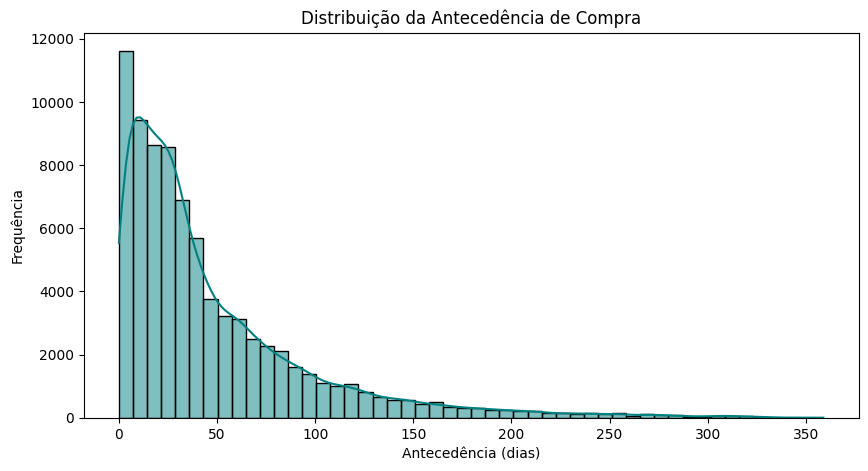

In [ ]:
import seaborn as sns

# Filtrar dados válidos
df_validos = df[df['Antecedencia (dias)'] >= 0]

# Plotar distribuição
plt.figure(figsize=(10, 5))
sns.histplot(df_validos['Antecedencia (dias)'], bins=50, kde=True, color='teal')
plt.xlabel('Antecedência (dias)')
plt.ylabel('Frequência')
plt.title('Distribuição da Antecedência de Compra')
plt.show()


In [ ]:
# Top 10 companhias aéreas
cias_mais_vendidas = df['CiaAerea'].value_counts().head(10)

# Exibir resultado
print(cias_mais_vendidas)


CiaAerea
Azul           29535
Gol            25519
LATAM          23260
Argentinas       439
Tap              407
Copa             208
Delta            195
Sky Airline      150
United           142
ITA              115
Name: count, dtype: int64


In [ ]:
# Separar destinos nacionais e internacionais
df_nacional = df[df['Destino'].str.contains(', Brazil', na=False)]
df_internacional = df[~df['Destino'].str.contains(', Brazil', na=False)]

# Contar top 5 destinos
top_nacional = df_nacional['Destino'].value_counts().head(5)
top_internacional = df_internacional['Destino'].value_counts().head(5)

# Exibir resultados
print("Destinos Nacionais Mais Vendidos:")
print(top_nacional)
print("\nDestinos Internacionais Mais Vendidos:")
print(top_internacional)


Destinos Nacionais Mais Vendidos:
Destino
Sao Paulo, Brazil         15576
Rio De Janeiro, Brazil     7115
Recife, Brazil             5712
Salvador, Brazil           3755
Fortaleza, Brazil          3268
Name: count, dtype: int64

Destinos Internacionais Mais Vendidos:
Destino
Buenos Aires, Argentina    344
Santiago, Chile            239
Lisbon, Portugal           206
Paris, France              159
Orlando, United States     132
Name: count, dtype: int64


In [ ]:
# Convert 'IntervaloMedioDias' to numeric, handling errors
df['IntervaloMedioDias'] = pd.to_numeric(df['IntervaloMedioDias'], errors='coerce')

# Calculate tempo_medio_entre_compras after conversion
tempo_medio_entre_compras = df['IntervaloMedioDias'].mean()

# Exibir resultado
print(f"Tempo médio entre compras: {tempo_medio_entre_compras:.2f} dias")


Tempo médio entre compras: 72.13 dias


<ipython-input-42-d6c1587555b0>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hora do Pedido'] = pd.to_datetime(df['Hora do Pedido'], errors='coerce').dt.hour


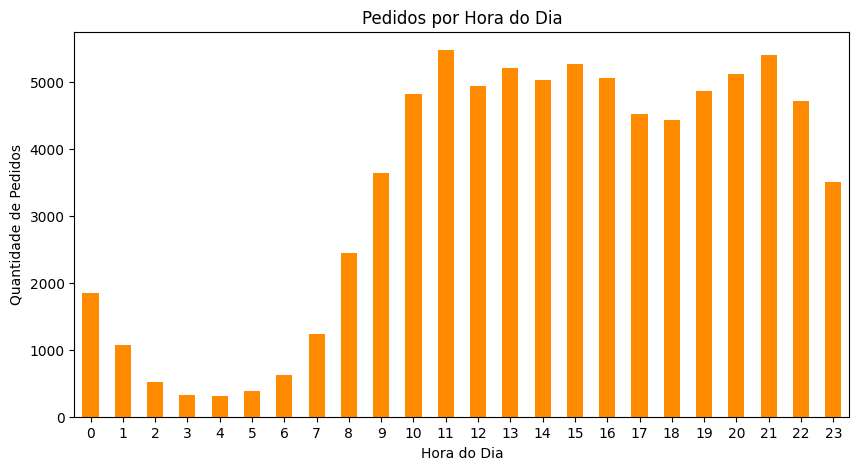

In [ ]:
# Converter hora para número inteiro
df['Hora do Pedido'] = pd.to_datetime(df['Hora do Pedido'], errors='coerce').dt.hour

# Contar pedidos por hora
pedidos_por_hora = df['Hora do Pedido'].value_counts().sort_index()

# Plotar gráfico
plt.figure(figsize=(10, 5))
pedidos_por_hora.plot(kind='bar', color='darkorange')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Pedidos')
plt.title('Pedidos por Hora do Dia')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Calcular tempo médio de viagem
tempo_medio_viagem = df['Dias em Viagem'].mean()

# Exibir resultado
print(f"Tempo médio de viagem: {tempo_medio_viagem:.2f} dias")


Tempo médio de viagem: 4.61 dias
